In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import timedelta
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("cardio_train.csv")

# Overview 

In [3]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
data.shape

(70000, 13)

# Checking Missing Value

In [5]:
data.isnull().sum().sum()

0

In [6]:
data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

# For X and Y column 

In [7]:
X=data.iloc[:,1:-1]
Y=data.iloc[:,-1:]

# Before Remove Outlier

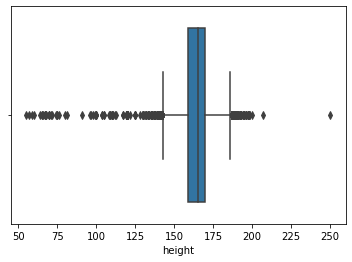

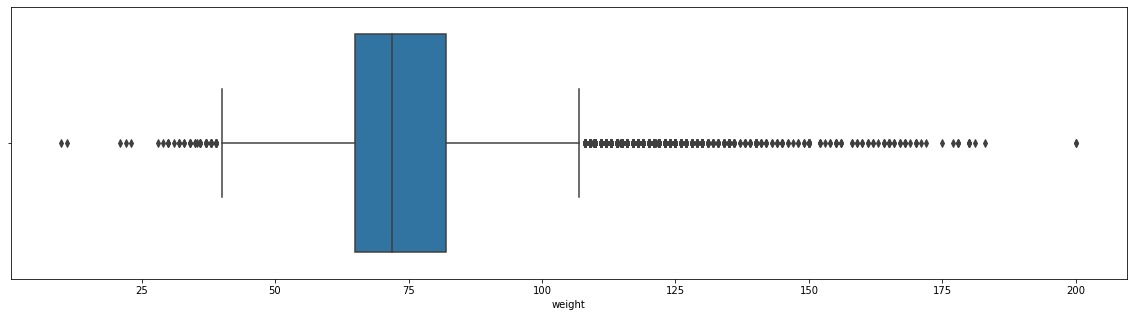

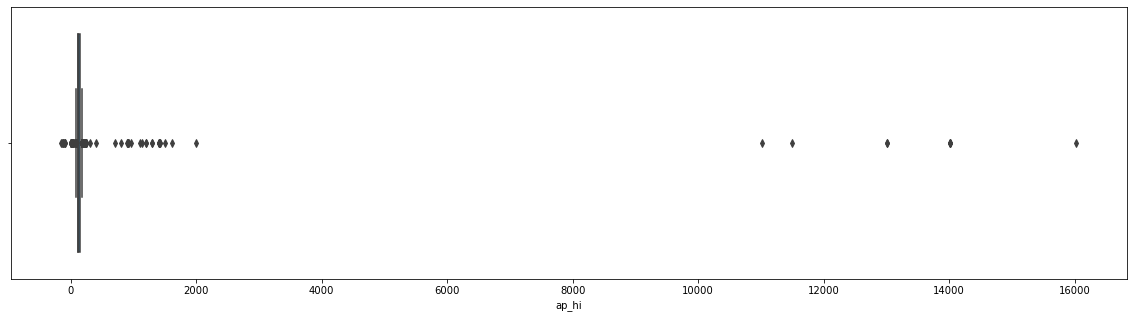

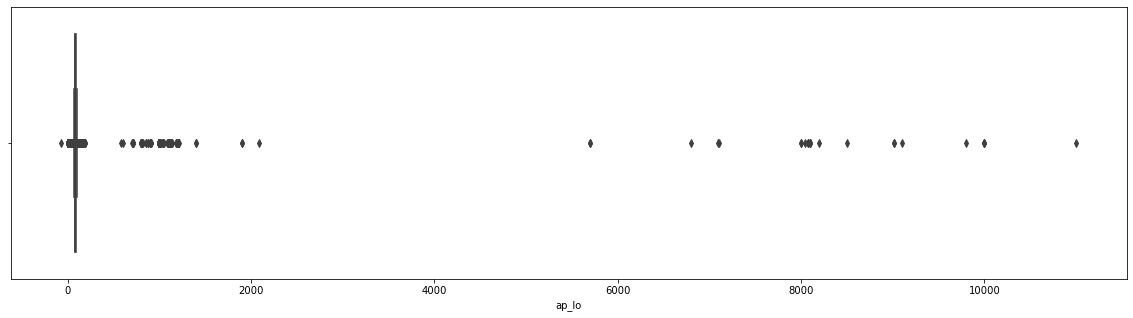

<Figure size 1440x360 with 0 Axes>

In [8]:
for i in data.iloc[:,3:7]:
    sns.boxplot(data[i])
    plt.figure(figsize=(20,5))

# Outlier Detect and Handle Function

In [9]:
def outlier(coloumn):
    Q1 = coloumn.quantile(0.25)
    Q3 = coloumn.quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    coloumn=np.where(coloumn>upper_whisker,upper_whisker,np.where(coloumn<lower_whisker,lower_whisker,coloumn))
    #sns.boxplot(coloumn)
    return coloumn

# Handle Outlier

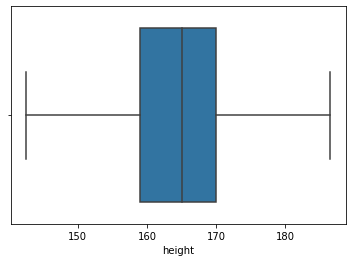

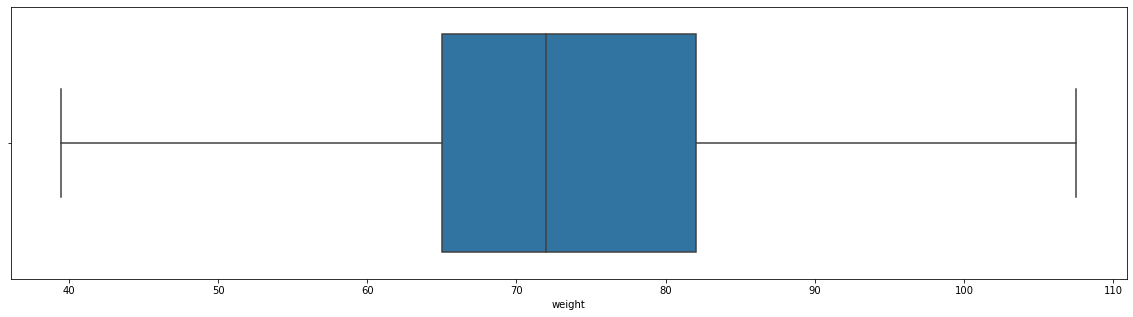

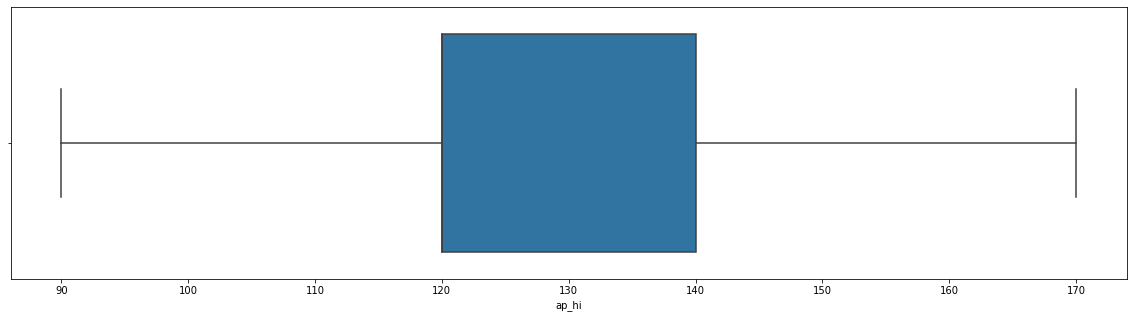

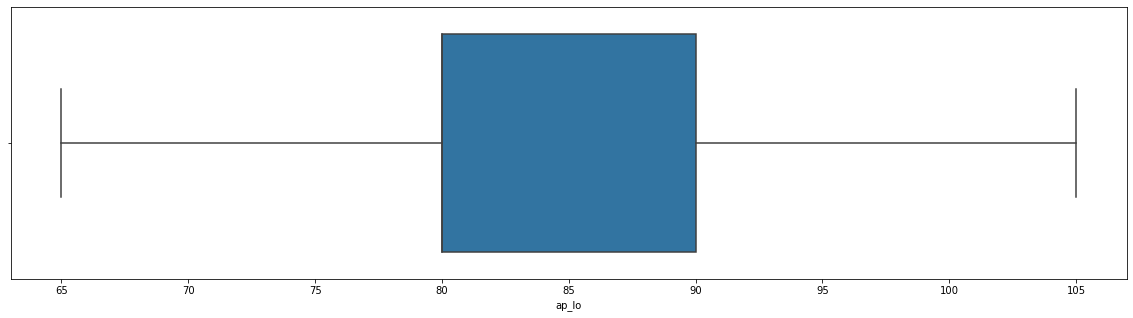

<Figure size 1440x360 with 0 Axes>

In [10]:
for i in data.iloc[:,3:7]:
    data[i] = outlier(data[i])
    sns.boxplot(data[i])
    plt.figure(figsize=(20,5))

# Convert Days to Year and Handle Outlier 

In [11]:
data['age'] = (data['age'] / 365).round().astype('int')
data['age'] = outlier(data['age'])

# Applying Standard Scaler

In [12]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [13]:
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

# KFold and Cross Val Score

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold_validation = KFold(10)

In [15]:
from sklearn.neural_network import MLPClassifier
start = datetime.datetime.now()
clf = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,
                    solver='adam', verbose=10,tol=0.000000001).fit(X_scaled, Y)
clf.predict(X_scaled)
clf.score(X_scaled, Y)
end = datetime.datetime.now()
mlp_time = end - start

Iteration 1, loss = 0.59560516
Iteration 2, loss = 0.55673086
Iteration 3, loss = 0.54698403
Iteration 4, loss = 0.54564578
Iteration 5, loss = 0.54245941
Iteration 6, loss = 0.54096941
Iteration 7, loss = 0.54046374
Iteration 8, loss = 0.53995234
Iteration 9, loss = 0.53913956
Iteration 10, loss = 0.53859327
Iteration 11, loss = 0.53814749
Iteration 12, loss = 0.53740596
Iteration 13, loss = 0.53762228
Iteration 14, loss = 0.53680820
Iteration 15, loss = 0.53596800
Iteration 16, loss = 0.53593441
Iteration 17, loss = 0.53575197
Iteration 18, loss = 0.53476226
Iteration 19, loss = 0.53414688
Iteration 20, loss = 0.53410142
Iteration 21, loss = 0.53371753
Iteration 22, loss = 0.53384517
Iteration 23, loss = 0.53237386
Iteration 24, loss = 0.53247224
Iteration 25, loss = 0.53160341
Iteration 26, loss = 0.53144637
Iteration 27, loss = 0.53093489
Iteration 28, loss = 0.53023371
Iteration 29, loss = 0.52992135
Iteration 30, loss = 0.52932131
Iteration 31, loss = 0.52889476
Iteration 32, los

Iteration 253, loss = 0.42235113
Iteration 254, loss = 0.42073303
Iteration 255, loss = 0.42163368
Iteration 256, loss = 0.42089529
Iteration 257, loss = 0.42054187
Iteration 258, loss = 0.41986031
Iteration 259, loss = 0.42160778
Iteration 260, loss = 0.41931171
Iteration 261, loss = 0.41900938
Iteration 262, loss = 0.42157811
Iteration 263, loss = 0.41949193
Iteration 264, loss = 0.41935169
Iteration 265, loss = 0.41708105
Iteration 266, loss = 0.41773499
Iteration 267, loss = 0.41774490
Iteration 268, loss = 0.41636120
Iteration 269, loss = 0.41726325
Iteration 270, loss = 0.41966562
Iteration 271, loss = 0.41834954
Iteration 272, loss = 0.41745260
Iteration 273, loss = 0.41620141
Iteration 274, loss = 0.41694713
Iteration 275, loss = 0.41678159
Iteration 276, loss = 0.41628519
Iteration 277, loss = 0.41411591
Iteration 278, loss = 0.41459103
Iteration 279, loss = 0.41388439
Iteration 280, loss = 0.41409047
Iteration 281, loss = 0.41484393
Iteration 282, loss = 0.41620732
Iteration 

In [17]:
mlp_time = end - start
mlp_time_micro = mlp_time / datetime.timedelta(microseconds=1)

mlp_score = clf.score(X_scaled, Y)

print(mlp_time_micro)
print(f"ACCURACY SCORE ON MLP : {clf.score(X_scaled, Y)}")
print("MLP Run Time - ", mlp_time)

1032957849.0
ACCURACY SCORE ON MLP : 0.8195714285714286
MLP Run Time -  0:17:12.957849


In [20]:
import pickle
pickle_out = open("classifier.pkl","wb")
pickle.dump(mlp_score, pickle_out)
pickle_out.close()